# Task 2 : Classify Iris Flowers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.shape

(150, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Summary Statistics

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Inferences from the descriptive statistics : 

* The dataset contains **150 samples (rows)** of iris flowers, with each sample having five numerical features: 
> "Id" ,"SepalLengthCm" ,"SepalWidthCm" ,"PetalLengthCm" ,"PetalWidthCm."

* The "Id" column seems to be a sequence of integers from 1 to 150, most likely representing the index or identifier of each sample.

* The "SepalLengthCm," "SepalWidthCm," "PetalLengthCm," and "PetalWidthCm" columns are  **continuous numerical features**, representing measurements in centimeters.


#### The quartiles (25%, 50%, 75%) indicate the distribution of the data, where the 50th percentile (median) divides the data into two halves:

* SepalLengthCm: 25% = 5.1, 50% = 5.8, 75% = 6.4

* SepalWidthCm: 25% = 2.8, 50% = 3.0, 75% = 3.3

* PetalLengthCm: 25% = 1.6, 50% = 4.35, 75% = 5.1

* PetalWidthCm: 25% = 0.3, 50% = 1.3, 75% = 1.8

# Visualisations

* **Pairplot** : A scatter plot matrix that shows scatter plots between all pairs of features, and hue differentiates data points belonging to different species.

* **Box plot** : It displays the distribution of a single numerical variable (e.g., Sepal Length) for each species using quartiles.

* **Violin plot** : It combines the box plot and kernel density plot, providing a better representation of the distribution of a variable (e.g., Petal Width) for each species.

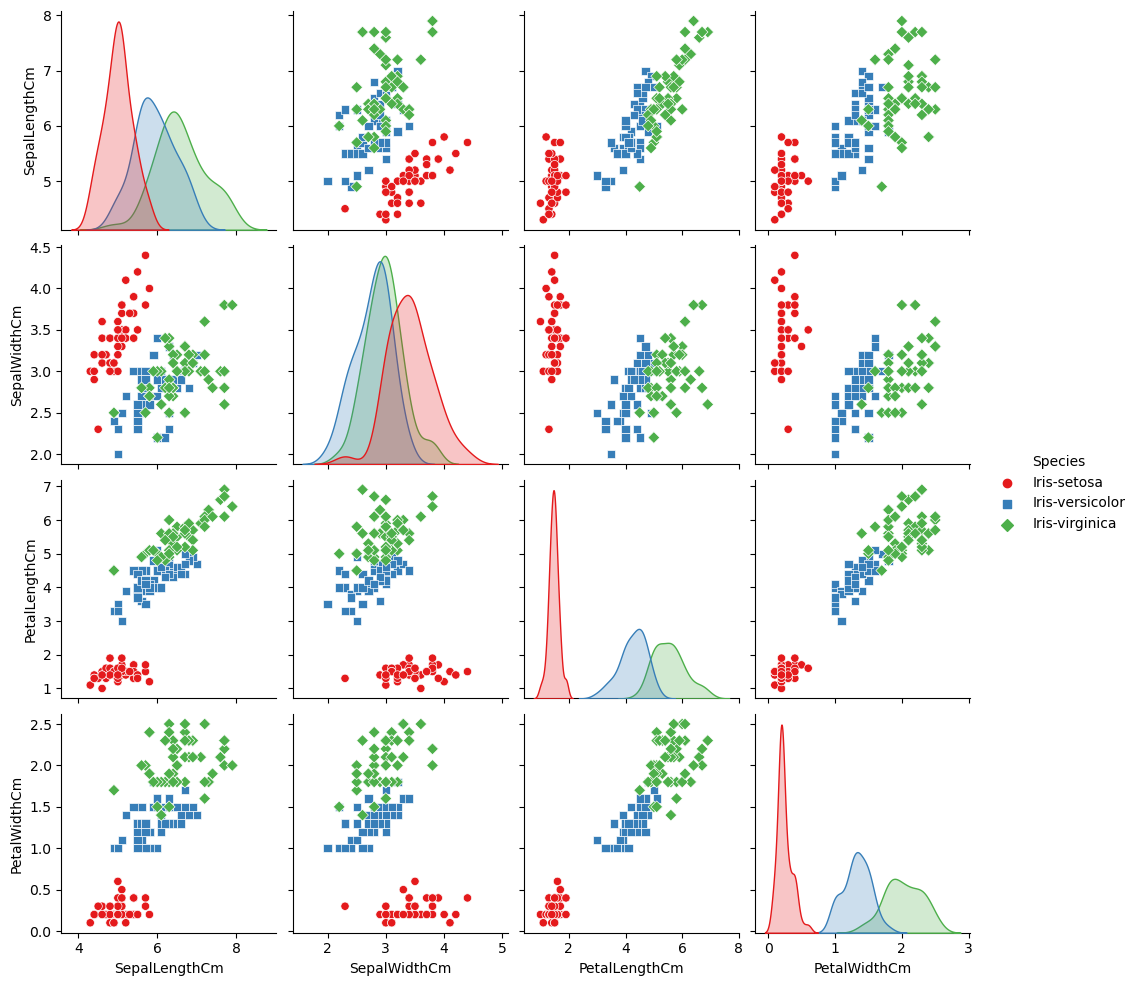

In [12]:
# Pairplot - Scatter plot matrix to visualize relationships between features
sns.pairplot(df.drop(columns=['Id']), hue='Species', markers=["o", "s", "D"], palette='Set1')
plt.show()


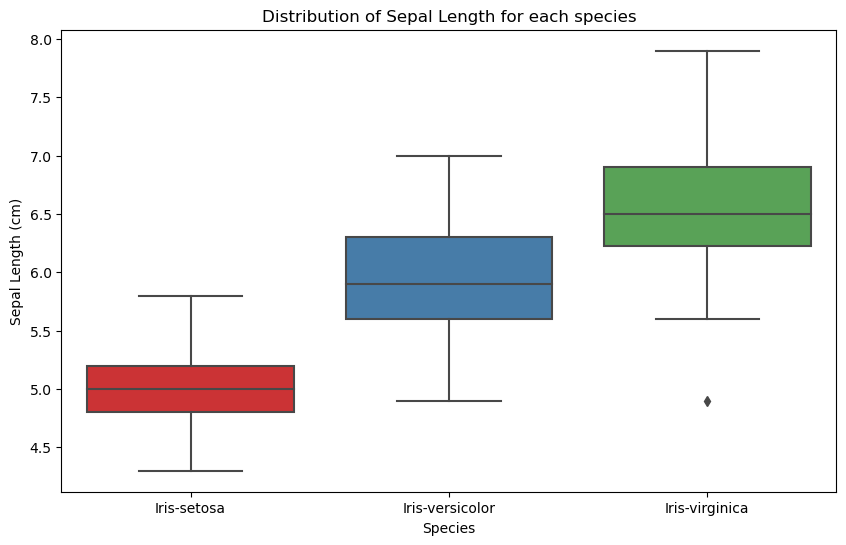

In [13]:
# Box plot to visualize the distribution of features for each species
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Id']), x='Species', y='SepalLengthCm', palette='Set1')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Distribution of Sepal Length for each species')
plt.show()


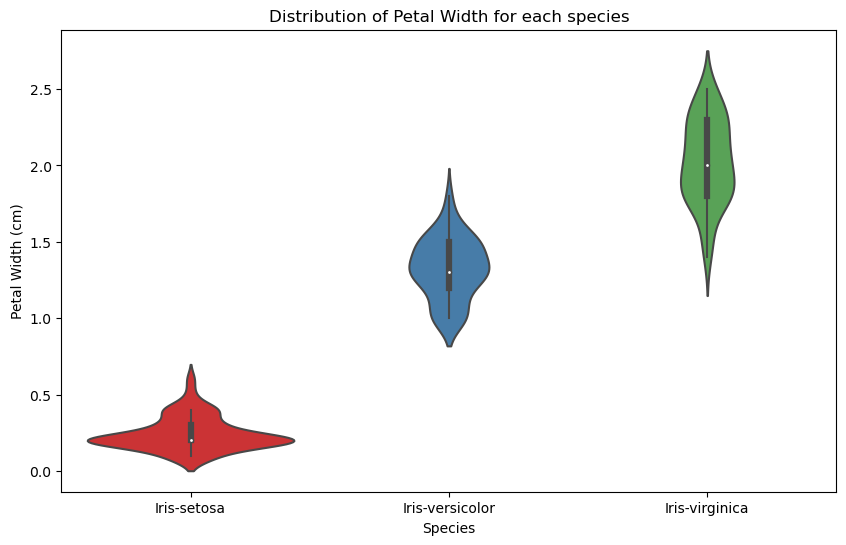

In [14]:
# Violin plot to visualize the distribution of features for each species
plt.figure(figsize=(10, 6))
sns.violinplot(data=df.drop(columns=['Id']), x='Species', y='PetalWidthCm', palette='Set1')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.title('Distribution of Petal Width for each species')
plt.show()

## Decision Tree Implementation

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix


# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DecisionTreeClassifier and fit the model on the training data
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



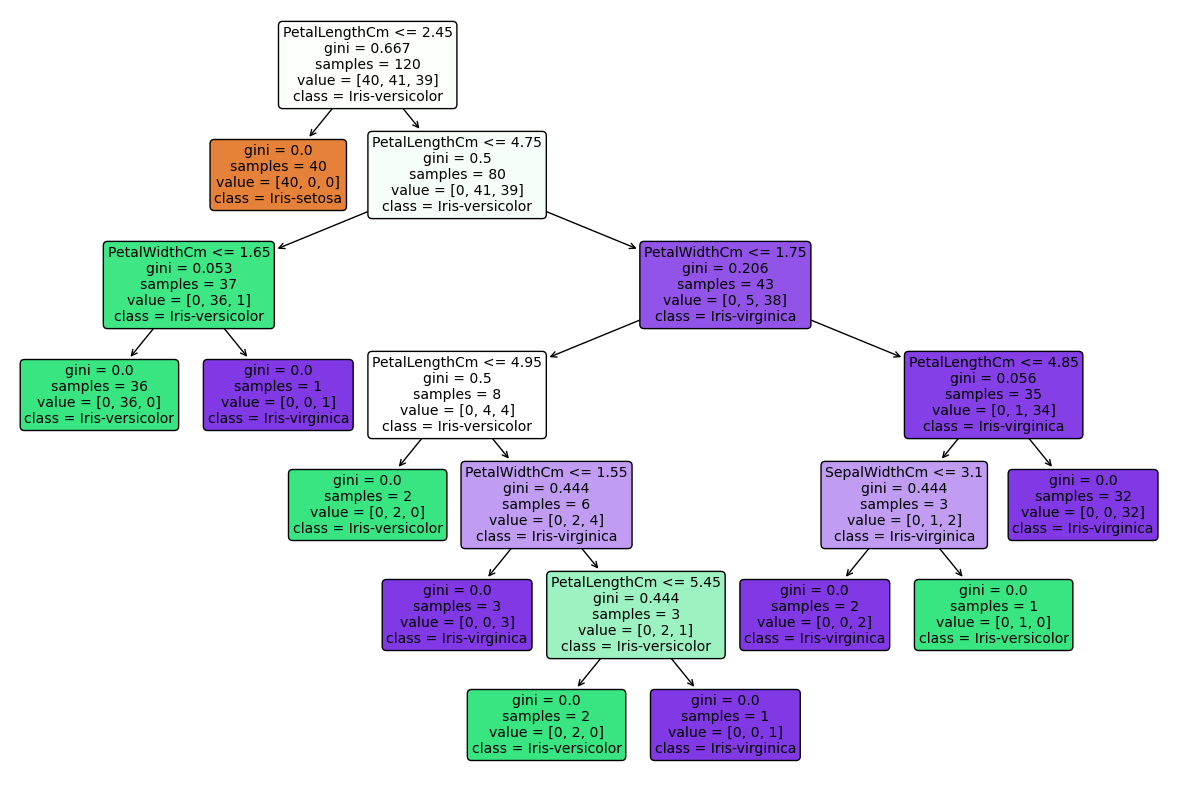

In [6]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X.columns, class_names=classifier.classes_, filled=True, rounded=True)
plt.show()

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


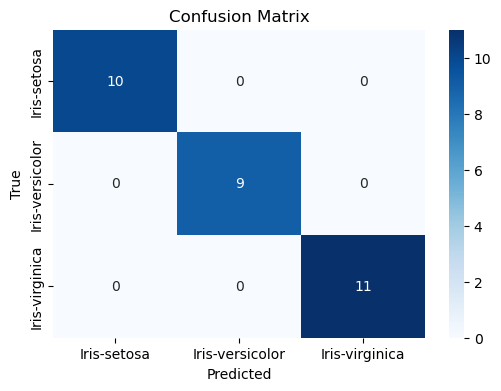

In [20]:
# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()